In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter



In [2]:
df = pd.read_csv(r"C:\Users\IGIRIMPUHWE Dositha\Desktop\Afretech\education\sentiment_tweets3.csv")


In [3]:
df.head()


,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [5]:
df.shape


(10314, 3)

In [6]:
df = df.drop(columns=['Index'])
df = df.reset_index(drop=True)


In [7]:
df.head()


,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [8]:
print("Total observations:", len(df))


Total observations: 10314


In [9]:
df.isnull().sum()


message to examine           0
label (depression result)    0
dtype: int64

In [10]:
df = df.dropna(subset=['message to examine'])


In [11]:
df['label (depression result)'].value_counts()


label (depression result)
0    8000
1    2314
Name: count, dtype: int64

In [12]:
df['label (depression result)'].value_counts().rename({
    0: 'No Depression',
    1: 'Depression'
})


label (depression result)
No Depression    8000
Depression       2314
Name: count, dtype: int64

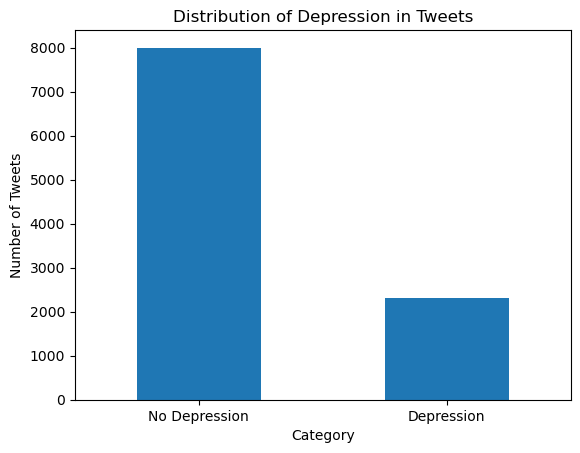

In [14]:
df['label (depression result)'].value_counts().plot(kind='bar')
plt.xticks([0, 1], ['No Depression', 'Depression'], rotation=0)
plt.title("Distribution of Depression in Tweets")
plt.xlabel("Category")
plt.ylabel("Number of Tweets")
plt.show()


In [15]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [16]:
df['clean_message'] = df['message to examine'].apply(clean_text)


In [17]:
df[['message to examine', 'clean_message']].head()


,message to examine,clean_message
0,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss him...
1,is reading manga http://plurk.com/p/mzp1e,is reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,
3,@lapcat Need to send 'em to my accountant tomo...,need to send em to my accountant tomorrow oddl...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,add me on myspace myspacecomlookthunder


In [18]:
df['text_length'] = df['clean_message'].apply(len)


In [19]:
df.groupby('label (depression result)')['text_length'].mean()


label (depression result)
0     59.576250
1    121.962835
Name: text_length, dtype: float64

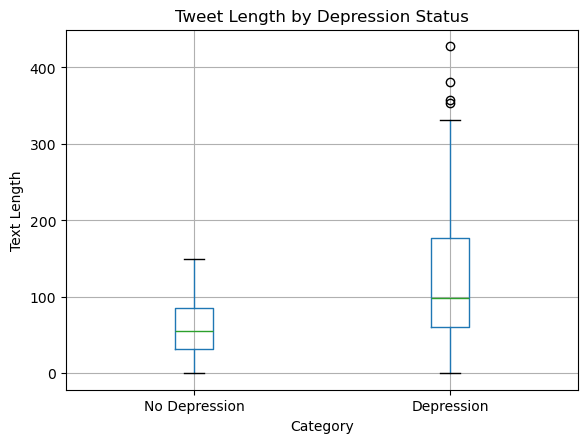

In [20]:
df.boxplot(column='text_length', by='label (depression result)')
plt.xticks([1, 2], ['No Depression', 'Depression'])
plt.title("Tweet Length by Depression Status")
plt.suptitle("")
plt.xlabel("Category")
plt.ylabel("Text Length")
plt.show()


In [22]:
depressed_posts = df[df['label (depression result)'] == 1]
non_depressed_posts = df[df['label (depression result)'] == 0]


In [23]:
words_dep = " ".join(depressed_posts['clean_message']).split()
Counter(words_dep).most_common(20)


[('depression', 2134),
 ('and', 1302),
 ('to', 1286),
 ('i', 1201),
 ('the', 1137),
 ('a', 989),
 ('of', 921),
 ('is', 706),
 ('my', 643),
 ('you', 617),
 ('in', 541),
 ('with', 484),
 ('it', 470),
 ('for', 448),
 ('that', 435),
 ('me', 393),
 ('have', 333),
 ('anxiety', 310),
 ('not', 294),
 ('but', 292)]